<a href="https://colab.research.google.com/github/Chaitanyachafle/Portfolio/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [125]:
 data= pd.read_csv("/content/drive/MyDrive/netflix.csv")

In [126]:
data.shape

(8807, 12)

In [127]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [128]:
data["date_added"]=pd.to_datetime(data["date_added"])

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [130]:
#    Title +Cast
#step-1= Split the nested column and make it in list using to_list function


In [131]:
cast_split=data["cast"].str.split(',').to_list()




In [132]:
#Step-2 Create dataframe with "title" and "cast_Split"

In [133]:
df=pd.DataFrame(cast_split,index=data['title'])

In [134]:
# Step-3 Reset index to get dataframe columns

In [135]:
df.reset_index(inplace=True)

In [136]:
df=df[['title',0]]

In [137]:
#step-4 Melt the list of split value of cast

In [138]:
df_melt=pd.melt(df,
                id_vars= ["title"],
                var_name="cast")

In [139]:
df_melt.head()

,title,cast,value
0,Dick Johnson Is Dead,0,NaN
1,Blood & Water,0,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th..."
2,Ganglands,0,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ..."
3,Jailbirds New Orleans,0,NaN
4,Kota Factory,0,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al..."


In [140]:
#Step-4
#Drop unnessary column

In [141]:
df_melt.drop("cast",axis=1,inplace=True)

In [142]:
# Step-5 Rename column

In [143]:

df_melt.rename({"value":"cast"},axis=1,inplace=True)

In [144]:
#Step-6 Explode the data so that all list of values get accomodate in columns

In [145]:
df_cast=df_melt.explode("cast")

In [146]:
# Replace the existing NaN value with Mode for Catogorical column

In [147]:
mode=df_cast["cast"].mode().iloc[0]

In [148]:
mode

' Anupam Kher'

In [149]:
# check the null value in column using isnull function

In [150]:
df_cast.isnull().sum()

title      0
cast     825
dtype: int64

In [151]:
#Fill the NAN value using fillna function with Mode

In [152]:
df_cast['cast'].fillna(mode,inplace=True)

In [153]:
# cross check the Null value now

In [154]:
df_cast.isnull().sum()

title    0
cast     0
dtype: int64

In [155]:
# this data for Title with cast is ready

In [156]:
df_cast.head()

,title,cast
0,Dick Johnson Is Dead,Anupam Kher
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba


In [157]:
# Title + Director

In [158]:
# Step-1 split the director nested column

In [159]:
dir_split=data["director"].str.split(',').to_list()

In [160]:
#Step-2 Created new dataframe

In [161]:
df_01=pd.DataFrame({'director':dir_split},index=data["title"])

In [162]:
df_01.head()

,director
title,
Dick Johnson Is Dead,[Kirsten Johnson]
Blood & Water,NaN
Ganglands,[Julien Leclercq]
Jailbirds New Orleans,NaN
Kota Factory,NaN


In [163]:
# Step-3 reset indexes

In [164]:
df_01.reset_index(inplace=True)

In [165]:
df_01.columns

Index(['title', 'director'], dtype='object')

In [166]:
# Step-4 Melt the director column

In [167]:
df_01_melt=pd.melt(df_01,
                   id_vars="title",
                   var_name="parameter",
                   value_name="director")

<ipython-input-167-7c6c23ef6b95>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_01_melt=pd.melt(df_01,


In [168]:
df_01_melt.head()

,title,parameter,director
0,Dick Johnson Is Dead,director,[Kirsten Johnson]
1,Blood & Water,director,NaN
2,Ganglands,director,[Julien Leclercq]
3,Jailbirds New Orleans,director,NaN
4,Kota Factory,director,NaN


In [169]:
#Step-5 Drop uncessary column

In [170]:
df_01_melt.drop("parameter",axis=1,inplace=True)

In [171]:
df_director=df_01_melt.explode('director')

In [172]:
#Step-6 Explode director column

In [173]:
df_director.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN


In [174]:
# Step-7= Generating mode to replace NAN value

In [175]:
mode=df_director['director'].mode().iloc[0]

In [176]:
mode

'Rajiv Chilaka'

In [177]:
#Step-8 =Filling NAN with mode value "Rajiv chilaka"

In [178]:
df_director['director'].fillna(mode,inplace=True)

In [179]:
df_director.isnull().sum()

title       0
director    0
dtype: int64

In [180]:
# Now df_director is ready to use

In [181]:
df_director.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Rajiv Chilaka
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Rajiv Chilaka
4,Kota Factory,Rajiv Chilaka


In [182]:
# Title + Country

In [183]:
# Step-1 split the Country nested column

In [184]:
country_split=data["country"].str.split(',').to_list()

In [185]:
#Step-2 Created new dataframe
df_02=pd.DataFrame({"country" :country_split},index=data['title'])

In [186]:
df_02.reset_index(inplace=True)

In [187]:
df_02.columns

Index(['title', 'country'], dtype='object')

In [188]:
# Step-4 Melt the Country column

In [189]:
df_02_melt=pd.melt(df_02,
                   id_vars="title",
                   var_name="parameter",
                   value_name="country")
df_02_melt


<ipython-input-189-425a8a0c63d1>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_02_melt=pd.melt(df_02,


,title,parameter,country
0,Dick Johnson Is Dead,country,[United States]
1,Blood & Water,country,[South Africa]
2,Ganglands,country,NaN
3,Jailbirds New Orleans,country,NaN
4,Kota Factory,country,[India]
...,...,...,...
8802,Zodiac,country,[United States]
8803,Zombie Dumb,country,NaN
8804,Zombieland,country,[United States]
8805,Zoom,country,[United States]


In [190]:
#Step-5 Drop uncessary column

In [191]:
df_02_melt.drop("parameter",axis=1,inplace=True)

In [192]:
#Step-6 Explode country column

In [193]:
df_con=df_02_melt.explode("country")

In [194]:
df_con.isnull().sum()

title        0
country    831
dtype: int64

In [195]:
# Step-7= Generating mode to replace NAN value

In [196]:
mode=df_con["country"].mode().iloc[0]
mode

'United States'

In [197]:
#Step-8 =Filling NAN with mode value "United States"

In [198]:
df_con['country'].fillna(mode,inplace=True)

In [199]:
df_con.isnull().sum()

title      0
country    0
dtype: int64

In [200]:
# Title + Listed in

In [201]:
# Step-1 split the listedin nested column

In [202]:
listed_split=data["listed_in"].str.split(',').to_list()


In [203]:
#Step-2 Created new dataframe
df_03=pd.DataFrame({"listed":listed_split},index=data["title"])
df_03.head()

,listed
title,
Dick Johnson Is Dead,[Documentaries]
Blood & Water,"[International TV Shows, TV Dramas, TV Myste..."
Ganglands,"[Crime TV Shows, International TV Shows, TV ..."
Jailbirds New Orleans,"[Docuseries, Reality TV]"
Kota Factory,"[International TV Shows, Romantic TV Shows, ..."


In [204]:
#Step-3 reset index
df_03.reset_index(inplace=True)

In [205]:
#Step-4 melt the listed in column
df_03_melt=pd.melt(df_03,
                   id_vars="title",
                   var_name="parameter",
                   value_name='listed')
df_03_melt.head()

<ipython-input-205-ed74d71a2fdc>:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_03_melt=pd.melt(df_03,


,title,parameter,listed
0,Dick Johnson Is Dead,listed,[Documentaries]
1,Blood & Water,listed,"[International TV Shows, TV Dramas, TV Myste..."
2,Ganglands,listed,"[Crime TV Shows, International TV Shows, TV ..."
3,Jailbirds New Orleans,listed,"[Docuseries, Reality TV]"
4,Kota Factory,listed,"[International TV Shows, Romantic TV Shows, ..."


In [206]:
# Step-5 remove unnessary column
df_03_melt.drop("parameter",axis=1,inplace=True)

In [207]:
#Step-6 Explode listed in column
df_listed=df_03_melt.explode("listed")
df_listed.head()

,title,listed
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows


In [208]:
# No Null value so df_listed is ready to use

In [209]:
df_listed.isnull().sum()

title     0
listed    0
dtype: int64

In [210]:
df_listed.head()

,title,listed
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows


In [211]:
#Merge all 4 table one by one

In [212]:

cast_director=df_director.merge(df_cast,on="title",how="inner")
cast_director

,title,director,cast
0,Dick Johnson Is Dead,Kirsten Johnson,Anupam Kher
1,Blood & Water,Rajiv Chilaka,Ama Qamata
2,Blood & Water,Rajiv Chilaka,Khosi Ngema
3,Blood & Water,Rajiv Chilaka,Gail Mabalane
4,Blood & Water,Rajiv Chilaka,Thabang Molaba
...,...,...,...
70807,Zubaan,Mozez Singh,Manish Chaudhary
70808,Zubaan,Mozez Singh,Meghna Malik
70809,Zubaan,Mozez Singh,Malkeet Rauni
70810,Zubaan,Mozez Singh,Anita Shabdish


In [213]:
cast_director_country=cast_director.merge(df_con,on="title")
cast_director_country.head()

,title,director,cast,country
0,Dick Johnson Is Dead,Kirsten Johnson,Anupam Kher,United States
1,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa
2,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa
3,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa
4,Blood & Water,Rajiv Chilaka,Thabang Molaba,South Africa


In [214]:
cast_director_country_listed=cast_director_country.merge(df_listed,on='title')
cast_director_country_listed.head()

,title,director,cast,country,listed
0,Dick Johnson Is Dead,Kirsten Johnson,Anupam Kher,United States,Documentaries
1,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows


In [215]:
data_sorted=data[["show_id","title","type","date_added","rating","duration",]]
data_sorted.head()


,show_id,title,type,date_added,rating,duration
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,90 min
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons
2,s3,Ganglands,TV Show,2021-09-24,TV-MA,1 Season
3,s4,Jailbirds New Orleans,TV Show,2021-09-24,TV-MA,1 Season
4,s5,Kota Factory,TV Show,2021-09-24,TV-MA,2 Seasons


In [216]:
# Now df_fianl is ready to use

In [217]:
df_final=data_sorted.merge(cast_director_country_listed,on="title")
df_final.head()

,show_id,title,type,date_added,rating,duration,director,cast,country,listed
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,90 min,Kirsten Johnson,Anupam Kher,United States,Documentaries
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows


In [218]:
df_final["duration_fixed"]=df_final['duration'].str.split(' ').str.get(0)
df_final.drop('duration',axis=1,inplace=True)
df_final.head()

,show_id,title,type,date_added,rating,director,cast,country,listed,duration_fixed
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,Kirsten Johnson,Anupam Kher,United States,Documentaries,90
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,2
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,2
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,2
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,2


In [219]:
df_final.describe()

<ipython-input-219-e806ec50200d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_final.describe()


,show_id,title,type,date_added,rating,director,cast,country,listed,duration_fixed
count,202065,202065,202065,201907,201998,202065,202065,202065,202065,202062
unique,8807,8807,2,1714,17,5120,39296,197,73,210
top,s7165,Kahlil Gibran's The Prophet,Movie,2020-01-01 00:00:00,TV-MA,Rajiv Chilaka,Anupam Kher,United States,International Movies,1
freq,700,700,145917,3748,73915,50790,2265,61765,27141,35035
first,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   show_id         202065 non-null  object        
 1   title           202065 non-null  object        
 2   type            202065 non-null  object        
 3   date_added      201907 non-null  datetime64[ns]
 4   rating          201998 non-null  object        
 5   director        202065 non-null  object        
 6   cast            202065 non-null  object        
 7   country         202065 non-null  object        
 8   listed          202065 non-null  object        
 9   duration_fixed  202062 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 17.0+ MB


In [221]:
df_final.head()

,show_id,title,type,date_added,rating,director,cast,country,listed,duration_fixed
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,Kirsten Johnson,Anupam Kher,United States,Documentaries,90
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,2
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,2
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,2
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,2


In [222]:
# Total number 2431.9 hr and 935.8 hr duration of movies and Tv shows available in netflix
show=df_final[['type','duration_fixed']].groupby('type').count()
print(show)


         duration_fixed
type                   
Movie            145914
TV Show           56148


In [223]:
df_final.isnull().sum()

show_id             0
title               0
type                0
date_added        158
rating             67
director            0
cast                0
country             0
listed              0
duration_fixed      3
dtype: int64

In [224]:
date_median=df_final["date_added"].median()

In [225]:
df_final["date_added"].fillna(date_median,inplace=True)


In [226]:
df_final.head()

,show_id,title,type,date_added,rating,director,cast,country,listed,duration_fixed
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,Kirsten Johnson,Anupam Kher,United States,Documentaries,90
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,2
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,2
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,2
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,2


In [227]:
# Oldest and Newest date of show added on netflix
df_final.agg({"date_added":["min",'max']})

,date_added
min,2008-01-01
max,2021-09-25


In [228]:
# Netflix have most number of Internal movies,Dramas comedies shows listed in Top-3 listed program
df_final.groupby("listed")['listed'].count().sort_values(ascending=False)


listed
 International Movies    27141
Dramas                   19657
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: listed, Length: 73, dtype: int64

In [229]:
# Out of 8807 show :Total 6131 movies and 2676 Tv showw available in Netflix
grouped=df_final.groupby('type')['show_id']
unique_show=grouped.apply(lambda x: x.nunique())
unique_show


type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [230]:
df_final.describe()

<ipython-input-230-e806ec50200d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_final.describe()


,show_id,title,type,date_added,rating,director,cast,country,listed,duration_fixed
count,202065,202065,202065,202065,201998,202065,202065,202065,202065,202062
unique,8807,8807,2,1714,17,5120,39296,197,73,210
top,s7165,Kahlil Gibran's The Prophet,Movie,2020-01-01 00:00:00,TV-MA,Rajiv Chilaka,Anupam Kher,United States,International Movies,1
freq,700,700,145917,3748,73915,50790,2265,61765,27141,35035
first,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
# Kahlil Gibran's The Prophet is tha top mist movie
# Rajuv chilaka is top Director
# Anupam Kher is top cast
# Unitest State is top country

In [232]:
df_final['release_year']=df_final["date_added"].dt.year


In [233]:
df_final.head(10)

,show_id,title,type,date_added,rating,director,cast,country,listed,duration_fixed,release_year
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,Kirsten Johnson,Anupam Kher,United States,Documentaries,90,2021
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,2,2021
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,2,2021
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,2,2021
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,2,2021
5,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Khosi Ngema,South Africa,TV Dramas,2,2021
6,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Khosi Ngema,South Africa,TV Mysteries,2,2021
7,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Gail Mabalane,South Africa,International TV Shows,2,2021
8,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Gail Mabalane,South Africa,TV Dramas,2,2021
9,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Gail Mabalane,South Africa,TV Mysteries,2,2021


In [234]:
top3_type=df_final['type'].value_counts().index[:3]
top3_listed=df_final['listed'].value_counts().index[:3]
top3_country=df_final['country'].value_counts().index[:3]


In [235]:
top3_data=df_final.loc[
    (df_final['type'].isin(top3_type))
    & (df_final['listed'].isin(top3_listed))
    & (df_final['country'].isin(top3_country))]

In [236]:
top3_data["release_year"]=top3_data["release_year"].astype('int64')




<ipython-input-236-84dc61bd61de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3_data["release_year"]=top3_data["release_year"].astype('int64')


In [237]:
top3_data

,show_id,title,type,date_added,rating,director,cast,country,listed,duration_fixed,release_year
179,s8,Sankofa,Movie,2021-09-24,TV-MA,Haile Gerima,Kofi Ghanaba,United States,Dramas,125,2021
181,s8,Sankofa,Movie,2021-09-24,TV-MA,Haile Gerima,Kofi Ghanaba,United States,International Movies,125,2021
197,s8,Sankofa,Movie,2021-09-24,TV-MA,Haile Gerima,Oyafunmike Ogunlano,United States,Dramas,125,2021
199,s8,Sankofa,Movie,2021-09-24,TV-MA,Haile Gerima,Oyafunmike Ogunlano,United States,International Movies,125,2021
215,s8,Sankofa,Movie,2021-09-24,TV-MA,Haile Gerima,Alexandra Duah,United States,Dramas,125,2021
...,...,...,...,...,...,...,...,...,...,...,...
202057,s8807,Zubaan,Movie,2019-03-02,TV-14,Mozez Singh,Malkeet Rauni,India,International Movies,111,2019
202059,s8807,Zubaan,Movie,2019-03-02,TV-14,Mozez Singh,Anita Shabdish,India,Dramas,111,2019
202060,s8807,Zubaan,Movie,2019-03-02,TV-14,Mozez Singh,Anita Shabdish,India,International Movies,111,2019
202062,s8807,Zubaan,Movie,2019-03-02,TV-14,Mozez Singh,Chittaranjan Tripathy,India,Dramas,111,2019


In [238]:
#Countplot

<Axes: xlabel='rating', ylabel='count'>

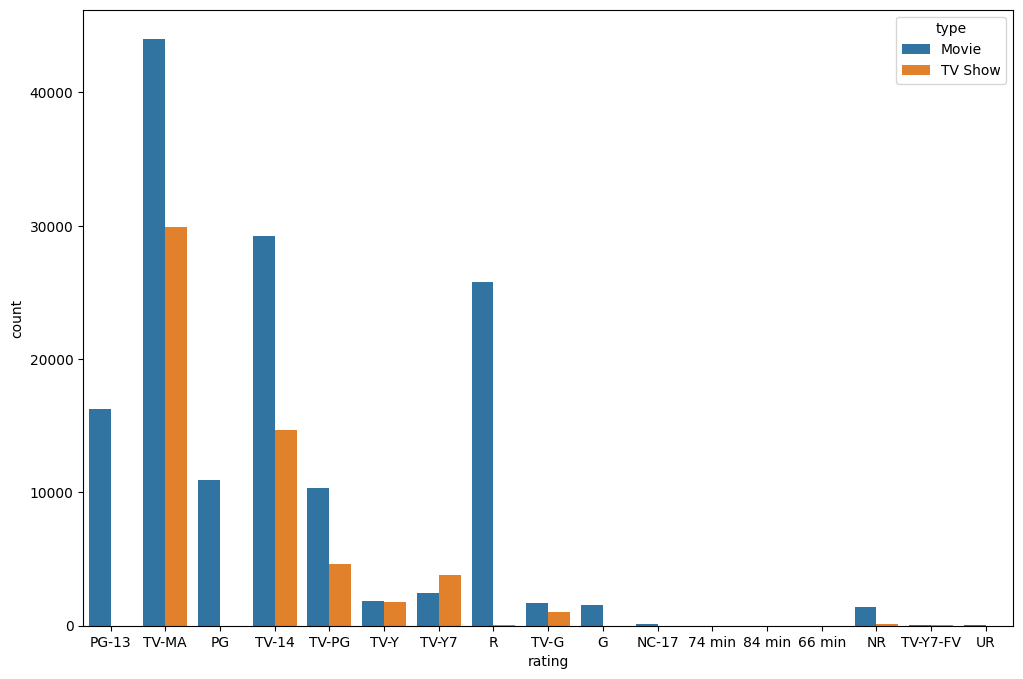

In [249]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating',hue='type',data=df_final)

In [ ]:
# Conclusion: Movies has higest Mature rating compared to TV

<Axes: xlabel='release_year', ylabel='Count'>

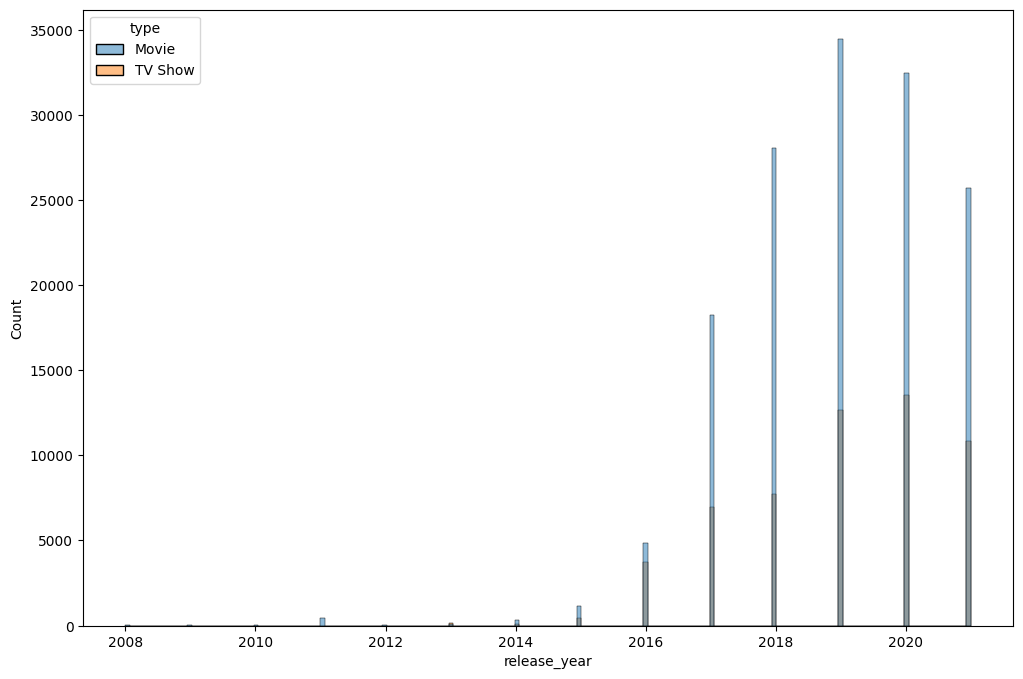

In [240]:
plt.figure(figsize=(12,8))
sns.histplot(x='release_year',hue="type",data=df_final)

In [ ]:
# Comclusion:Trend number of Movies getting released for 2017 compared to TV shows.

In [247]:
# All unique information of Netflix data
unique_info=df_final.apply(lambda x:x.nunique())
print("All unique information of Netflix\n",unique_info)

All unique information of Netflix
 show_id            8807
title              8807
type                  2
date_added         1714
rating               17
director           5120
cast              39296
country             197
listed               73
duration_fixed      210
release_year         14
dtype: int64


In [267]:
df_final["release_month"]=df_final(["date_added"]).dt.month
df_final.head()


,show_id,title,type,date_added,rating,director,cast,country,listed,duration_fixed,release_year,release_month
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,Kirsten Johnson,Anupam Kher,United States,Documentaries,90,2021,9
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,2,2021,9
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,2,2021,9
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,2,2021,9
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,2,2021,9


In [286]:
x_bar=df_final["release_month"]
y_bar=df_final["rating"].groupby(df_final['listed']).value_counts()
len(y_bar)

436

<Axes: xlabel='release_month', ylabel='Count'>

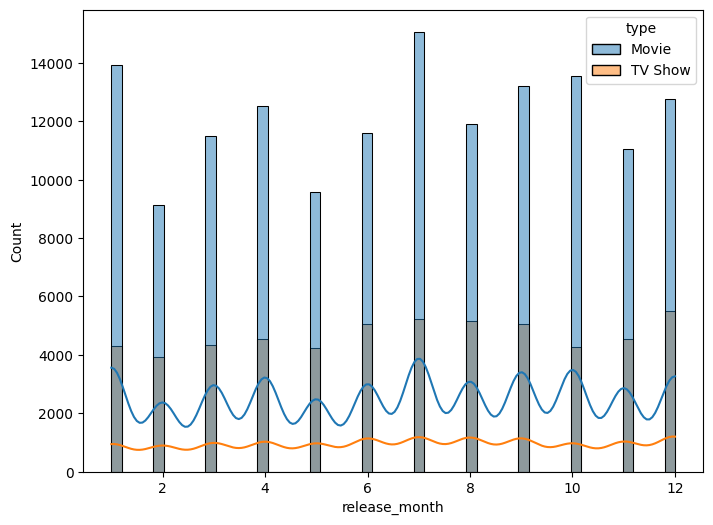

In [289]:
plt.figure(figsize=(8,6))
sns.histplot(df_final,x=x_bar,hue="type",kde=True)


In [ ]:
#Conclusion:#Most of movies got release in 2nd half of Year

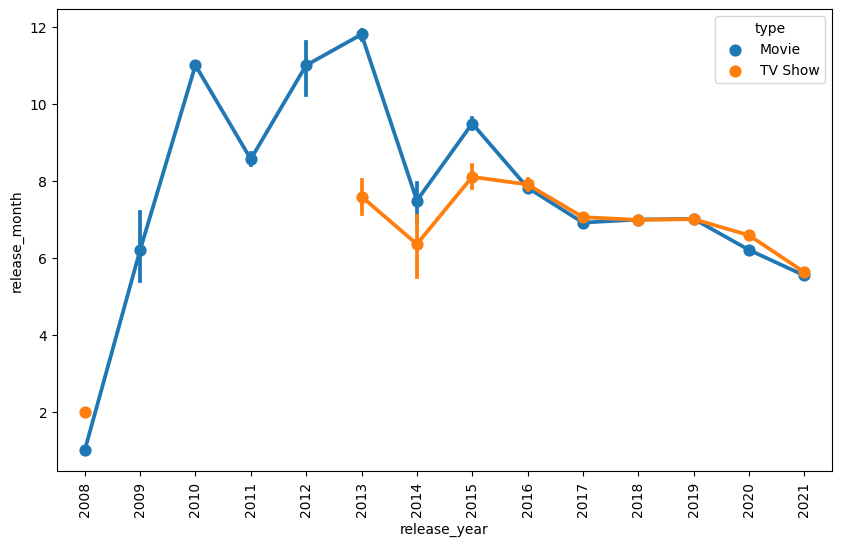

In [297]:
plt.figure(figsize=(10,6))
sns.pointplot(
    x = "release_year",
    y = "release_month",
    hue = "type",
    data = df_final

)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Conclusion:
# TV shows are getting relase in netflix from year-2013.

